In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Advertising.csv')

In [12]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 5)

In [14]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

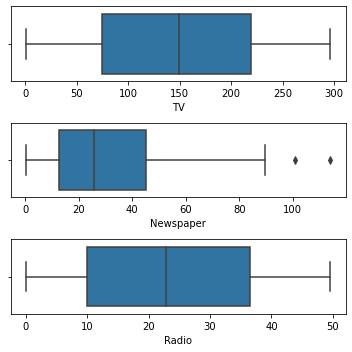

In [21]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

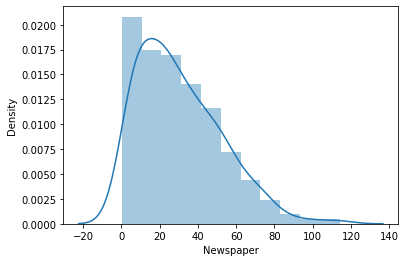

In [22]:
sns.distplot(df['Newspaper'])

In [23]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [24]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [25]:
data = df.copy()

In [26]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

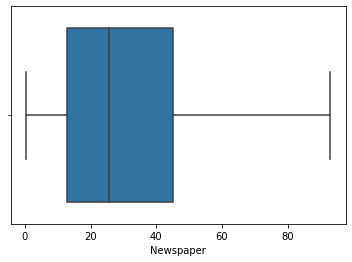

In [27]:
sns.boxplot(data['Newspaper'])

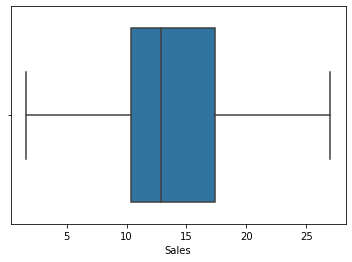

In [28]:
sns.boxplot(data['Sales']);

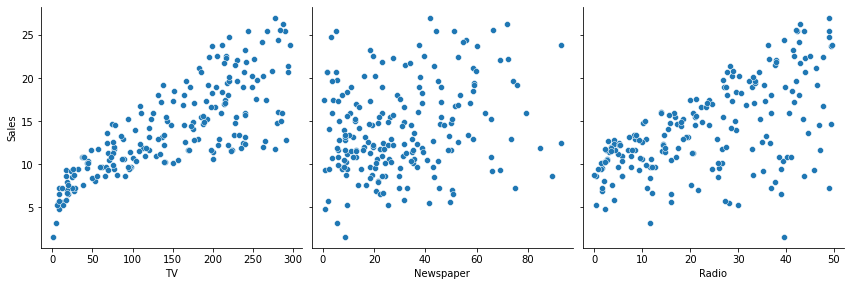

In [29]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

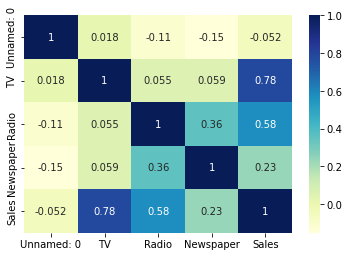

In [30]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [32]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
     

In [33]:
print(important_features)

['TV', 'Radio', 'Sales']


In [34]:
X = data['TV']
y = data['Sales']

In [35]:
X = X.values.reshape(-1,1)

In [36]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [38]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [39]:
print(X.shape,y.shape)

(200, 1) (200,)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [41]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [42]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [44]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)
print(knn_train_pred, knn_test_pred)

[12.9  15.18  6.96 15.76 13.74 19.38 17.22  5.92 21.4   9.66 20.14 15.06
 11.38  5.92 18.82 13.58 17.62 19.16 11.44 17.78 14.04 16.52 15.52 13.12
  9.86 15.76 21.6  11.   14.84  9.78  7.82 18.82 12.58 16.9  16.34 13.82
  9.78 16.34 10.28 17.92 18.72 20.38  7.72 12.72 20.14 16.02 15.52 18.72
 11.38  5.92 16.64 10.86 16.44 18.84 16.02  9.78 13.82 19.2  17.5  16.44
 16.72 13.74  7.82 10.96  7.04 12.9  11.6  16.06 16.02  7.38 19.16 16.06
 18.72 12.7  18.72 18.3  16.24 17.8  21.56 15.76 18.3  16.06 16.18 16.06
 14.84 16.7  18.92 13.82 11.38 18.92  8.32 12.34  9.7  10.34 20.8  12.58
 18.3   7.04 18.54 15.26 10.86 18.54  9.7  21.4  17.78 21.6  14.22  5.18
 13.28 18.   16.34 14.84  7.72 10.34  8.96 17.88 11.   21.6  12.58 20.38
 11.44 13.74 10.06 13.12  5.92  7.04 11.38  6.96 16.06 18.84 10.86 15.18
  7.72 15.76] [19.84 10.86 18.72 16.64 10.36 15.34 15.18 11.44 19.8  18.84  7.82  9.78
  8.32 17.12 13.74  5.18 16.52 19.2  11.44  9.78 18.88 15.34 15.76  8.32
 16.7  13.28 10.28 10.06  8.96 11.44 

In [45]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [46]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5585102317864145
RMSE: 3.262419626317531


In [47]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.614206,0.55851,3.26242,0.055696


In [48]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [50]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [51]:
print(svr_train_pred,svr_test_pred)

[13.46963811 13.89453382  7.98658338 14.53101475 13.34658897 17.87906117
 17.99087188  7.89603194 17.81236821  8.80789411 18.26150446 15.74405649
 10.58794417  7.89271959 18.04038918 15.03452741 17.54059708 17.95354901
 10.39991967 17.11873118 15.50920614 17.87084282 15.91491811 12.50254301
  9.15386393 14.52004034 17.5739673  11.18150815 13.07186886  8.92356759
  8.33573897 18.04460633 12.05074208 16.09549806 16.57173092 15.29131485
  8.86532565 16.52376915 11.48687512 16.33412747 18.24186291 18.232348
  8.07845659 12.29893083 18.2647878  18.05850429 15.94326548 18.25197394
 10.62415215  7.89770808 16.21271054 10.18920447 17.80638443 17.30016067
 18.05850429 11.54764363 15.18264172 16.93104584 17.61297971 17.81586969
 16.84119786 13.30922459  8.33220124 10.83358274  8.15544101 13.39362177
 10.52876617 18.11305653 18.07552078  8.10602632 17.93620089 18.11305653
 18.24327889 12.17442483 18.21854681 17.4280653  14.15924162 17.39046811
 17.96568861 14.7135875  17.45683526 18.10929707 13.6

In [52]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5835116884539195
RMSE: 3.1686984285856554


In [53]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.614206,0.55851,3.26242,0.055696
1,Support Vector Machine,0.586535,0.583512,3.168698,0.003024


In [54]:
import statsmodels.api as sm

In [55]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()
model.params

const    6.908115
x1       0.048085
dtype: float64

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           5.34e-29
Time:                        13:21:54   Log-Likelihood:                -350.41
No. Observations:                 134   AIC:                             704.8
Df Residuals:                     132   BIC:                             710.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9081      0.588     11.742      0.0

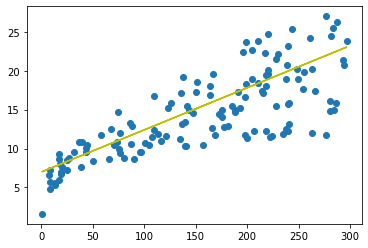

In [57]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [58]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

26     1.220470
3      4.306934
22    -1.942843
163    3.229909
145   -3.354508
         ...   
168   -0.165728
161    2.270959
194    3.193488
2      1.564815
179   -2.271071
Name: Sales, Length: 134, dtype: float64

In [59]:
y_train_pred

array([13.77953044, 14.19306561,  7.54284294, 14.77009144, 13.65450817,
       20.54515828, 18.18416093,  7.3216497 , 20.66056345,  8.68246895,
       19.11221081, 15.79912084, 10.50010031,  7.3120326 , 20.22298553,
       15.20286082, 17.51096413, 20.40571037, 10.30294982, 17.03972637,
       15.60197035, 17.97258479, 15.9433773 , 12.7264583 ,  9.04791864,
       14.76047435, 21.02601314, 11.15406292, 13.36599526,  8.80749121,
        8.11506022, 20.21336843, 12.18790086, 16.09725085, 16.51559458,
       15.4192455 ,  8.74498008, 16.47231764, 11.50989551, 16.30401844,
       19.54978873, 18.87178338,  7.72075923, 12.48603087, 19.18914758,
       18.32360884, 15.96742004, 19.47285195, 10.5385687 ,  7.32645825,
       16.19823037, 10.08656513, 17.87160527, 17.23206831, 18.32360884,
       11.58202374, 15.32788308, 16.85219298, 17.60232655, 17.88603092,
       16.7656391 , 13.61603979,  8.11025167, 10.76457048,  7.85059004,
       13.70259366, 10.43758918, 18.45343965, 18.36207723,  7.76

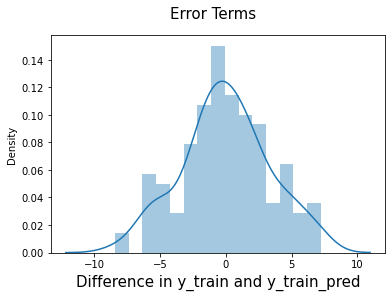

In [60]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

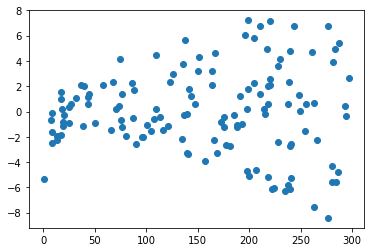

In [61]:
plt.scatter(X_train, res)
plt.show()

In [62]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
y_pred

array([20.83847975,  9.90384029, 19.66038534, 16.22227311,  9.77400947,
       13.21212171, 14.11132029, 10.19716175, 17.17436573, 17.31381364,
        8.05254908, 11.59644938,  8.13910296, 19.74213067, 13.60161414,
        7.10526501, 17.9437335 , 16.85700153, 10.23563014,  8.73536298,
       16.98683234, 13.240973  , 14.81817693,  8.23046538, 18.06875577,
       12.54373345, 11.42334164,  9.48068801,  8.28335942, 10.22601304,
       18.53037643,  7.25913857, 15.79912084, 17.83313689, 12.2311778 ,
       15.68852422, 15.93856875, 17.16955718, 17.76581721,  9.05753574,
       18.9727629 , 12.68798991,  7.84097295, 12.70241556,  7.16777615,
       10.5289516 , 16.64542539,  7.47071471, 10.12503352, 10.5193345 ,
       15.4192455 , 10.66839951, 11.84649391, 20.06911197, 11.43776728,
       16.51559458, 17.60232655, 10.58184563, 13.13037638, 15.14515823,
       11.2213826 ,  9.23064349, 11.53393825,  9.61051882, 20.88656523,
       15.0922642 ])

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

3.1085747024270622

In [64]:
r2 = r2_score(y_test, y_pred)
r2

0.5991668630162483

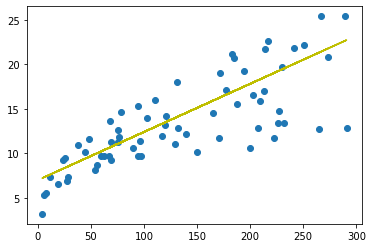

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()